---
# 🔬 Análisis del Estrés Académico en Estudiantes 🎓
---

### **🎯 Objetivo del Proyecto**

Este cuaderno explora los **factores que contribuyen al estrés académico**. Utilizaremos un conjunto de datos de estudiantes para identificar las causas principales y construiremos modelos de *machine learning* para predecir el nivel de estrés basándonos en variables como la presión social, el entorno de estudio y las estrategias de afrontamiento.

---

### **🗺️ Fases del Análisis**

El proyecto se divide en cuatro fases clave para ir de los datos crudos a un modelo predictivo:

1.  **🧹 Limpieza y Preparación de Datos**
    * *Cargaremos y prepararemos el conjunto de datos, manejando valores faltantes y transformando variables para el análisis.*

2.  **📊 Análisis Exploratorio de Datos (EDA)**
    * *Usaremos visualizaciones como histogramas y mapas de calor para descubrir patrones y relaciones en los datos.*

3.  **💬 Procesamiento de Lenguaje Natural (NLP)**
    * *Aplicaremos técnicas de NLP para analizar las respuestas de texto sobre cómo los estudiantes afrontan el estrés.*

4.  **🧠 Modelado Predictivo**
    * *Implementaremos un **Random Forest** (Machine Learning) y una **Red Neuronal** (Deep Learning) para predecir el índice de estrés.*

Este flujo de trabajo nos permitirá obtener una comprensión profunda de las causas del estrés estudiantil y servirá como una demostración de un proyecto de ciencia de datos de principio a fin.

---

### **🛠️ Tecnologías Clave**

`Pandas` │ `NumPy` │ `Matplotlib` │ `Seaborn` │ `NLTK` │ `Scikit-learn` │ `TensorFlow`

### Carga y Limpieza de Datos 🧹

El primer paso en cualquier proyecto de análisis de datos es cargar los datos y asegurarse de que estén limpios y listos para el análisis. Unos datos de alta calidad son fundamentales para obtener resultados fiables.

En el siguiente bloque de código, realizaremos las siguientes tareas esenciales:
* **Cargar el archivo CSV**: Utilizaremos la librería `pandas` para leer el archivo `academic Stress level - maintainance 1.csv` y cargarlo en una estructura de datos llamada DataFrame.
* **Renombrar Columnas**: Los nombres originales de las columnas son largos y contienen espacios, lo que puede dificultar su uso en el código. Los cambiaremos por nombres más cortos y sin espacios.
* **Manejar Valores Nulos**: Investigaremos si hay datos faltantes. En este caso, rellenaremos cualquier valor nulo en la columna `Study_Environment` con el valor más común (la moda).
* **Eliminar Columnas Irrelevantes**: La columna `Timestamp` no aporta valor a nuestro análisis predictivo, por lo que la eliminaremos.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import cosine
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [12]:
# Importa DAta
try:
    df = pd.read_csv('academic Stress level - maintainance 1.csv')
    print("Archivo CSV cargado exitosamente.")

    # Rename columnas
    df.columns = [
        'Timestamp', 'Academic_Stage', 'Peer_Pressure', 'Home_Pressure',
        'Study_Environment', 'Coping_Strategy', 'Bad_Habits',
        'Academic_Competition', 'Stress_Index'
    ]

    # Actualizar valores nulos en 'Study_Environment' con la moda
    if df['Study_Environment'].isnull().any():
        moda_entorno = df['Study_Environment'].mode()[0]
        df['Study_Environment'].fillna(moda_entorno, inplace=True)
        print(f"Valores nulos en 'Study_Environment' rellenados con '{moda_entorno}'.")

    # Delete la columna 'Timestamp'
    df = df.drop('Timestamp', axis=1)
    print("Columna 'Timestamp' eliminada.")

    print("\nVista previa de los datos limpios:")
    print(df.head())

except FileNotFoundError:
    print("\nERROR: El archivo 'academic Stress level - maintainance 1.csv' no fue encontrado.")
    print("Por favor, súbelo a tu entorno de Google Colab y vuelve a ejecutar la celda.")

Archivo CSV cargado exitosamente.
Valores nulos en 'Study_Environment' rellenados con 'Peaceful'.
Columna 'Timestamp' eliminada.

Vista previa de los datos limpios:
  Academic_Stage  Peer_Pressure  Home_Pressure Study_Environment  \
0  undergraduate              4              5             Noisy   
1  undergraduate              3              4          Peaceful   
2  undergraduate              1              1          Peaceful   
3  undergraduate              3              2          Peaceful   
4  undergraduate              3              3          Peaceful   

                                     Coping_Strategy Bad_Habits  \
0  Analyze the situation and handle it with intel...         No   
1  Analyze the situation and handle it with intel...         No   
2                   Social support (friends, family)         No   
3  Analyze the situation and handle it with intel...         No   
4  Analyze the situation and handle it with intel...         No   

   Academic_Competition

/tmp/ipython-input-164761250.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study_Environment'].fillna(moda_entorno, inplace=True)


### Análisis Exploratorio de Datos (EDA) y Visualización 📊

Ahora que nuestros datos están limpios y ordenados, podemos comenzar la fase de **Análisis Exploratorio de Datos (EDA)**. El objetivo del EDA es utilizar estadísticas y visualizaciones para entender mejor las características principales del conjunto de datos, descubrir patrones, identificar anomalías y probar hipótesis iniciales.

Comenzaremos creando un **histograma**, una de las herramientas más importantes para el análisis. Un histograma nos permite ver la **distribución de una variable numérica**, es decir, con qué frecuencia aparece cada rango de valores.

El siguiente código generará un histograma para la columna `Stress_Index`. Esto nos responderá visualmente a preguntas como:
* ¿Cuál es el nivel de estrés más común entre los estudiantes?
* ¿Los niveles de estrés tienden a ser bajos, altos o se distribuyen de manera uniforme?

Gráfico 'distribucion_estres.png' guardado.


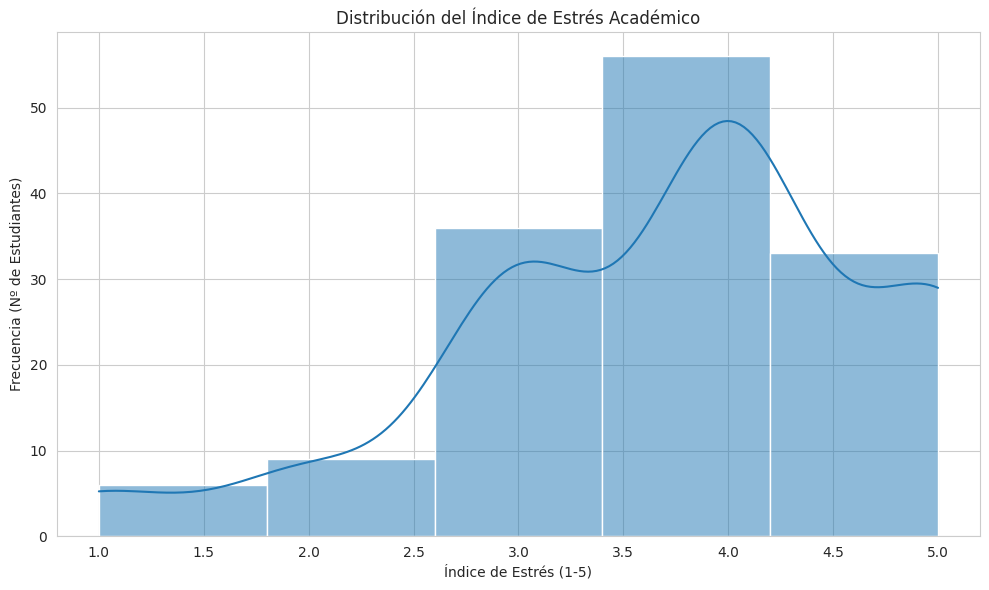

In [18]:
# --- Histograma de Distribución del Índice de Estrés ---

plt.figure(figsize=(10, 6))
# histograma.
sns.histplot(df['Stress_Index'], kde=True, bins=5)

plt.title('Distribución del Índice de Estrés Académico')
plt.xlabel('Índice de Estrés (1-5)')
plt.ylabel('Frecuencia (Nº de Estudiantes)')
plt.tight_layout()
plt.savefig('distribucion_estres.png')
print("Gráfico 'distribucion_estres.png' guardado.")
plt.show()

### Comparando el Estrés entre Grupos

Después de ver la distribución general del estrés, el siguiente paso lógico es investigar si ciertos grupos de estudiantes experimentan más estrés que otros. Una excelente manera de comparar un valor numérico (como el estrés promedio) entre diferentes categorías es mediante un **gráfico de barras**.

El siguiente código responderá a la pregunta: **"¿Qué nivel académico reporta, en promedio, el mayor índice de estrés?"**.

Para lograr esto, primero agruparemos a los estudiantes por su nivel académico (`Academic_Stage`), luego calcularemos el promedio del `Stress_Index` para cada grupo y finalmente visualizaremos estos promedios en un gráfico de barras para una comparación sencilla.

/tmp/ipython-input-1437351050.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress_por_nivel.index, y=stress_por_nivel.values, palette='viridis')


Gráfico 'estres_por_nivel.png' guardado.


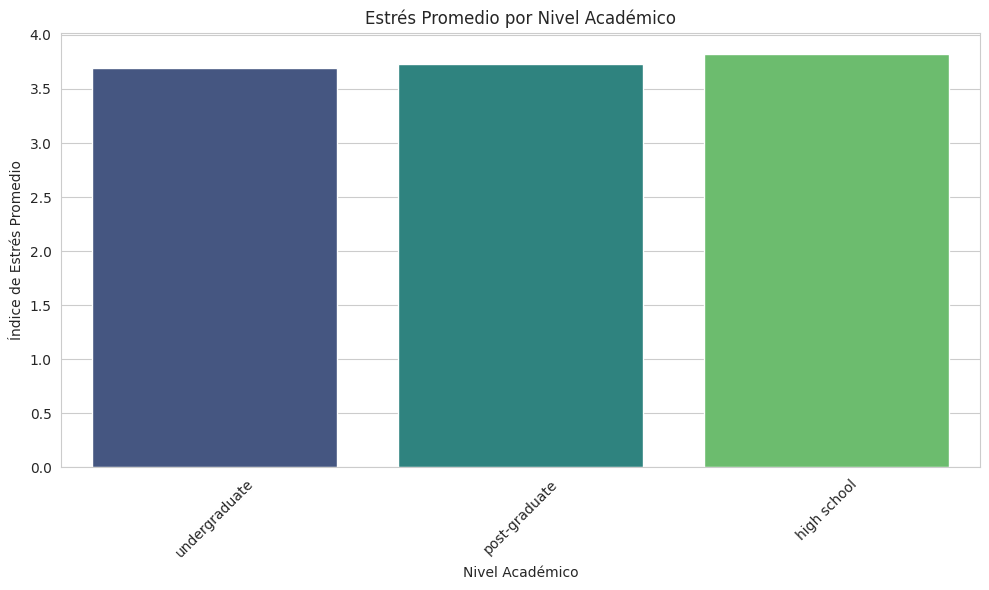

In [19]:
# --- Gráfico de Barras de Estrés Promedio por Nivel Académico ---

# 1. figura nueva.
plt.figure(figsize=(10, 6))
stress_por_nivel = df.groupby('Academic_Stage')['Stress_Index'].mean().sort_values()

# 3. gráfico de barras.
sns.barplot(x=stress_por_nivel.index, y=stress_por_nivel.values, palette='viridis')

plt.title('Estrés Promedio por Nivel Académico')
plt.xlabel('Nivel Académico')
plt.ylabel('Índice de Estrés Promedio')
plt.xticks(rotation=45) # Rotamos las etiquetas del eje X para que no se superpongan.
plt.tight_layout()
plt.savefig('estres_por_nivel.png')
print("Gráfico 'estres_por_nivel.png' guardado.")
plt.show()

### Descubriendo Relaciones entre Variables Numéricas

Hasta ahora, hemos analizado variables de forma individual o comparado una variable numérica con una categórica. Ahora, vamos a explorar si existen **relaciones lineales** entre las distintas variables numéricas de nuestro conjunto de datos. Para esto, utilizamos una medida estadística llamada **correlación**.

La correlación nos indica si dos variables tienden a moverse juntas:
* Una **correlación positiva** (cercana a +1) significa que cuando una variable aumenta, la otra también tiende a hacerlo.
* Una **correlación negativa** (cercana a -1) significa que cuando una variable aumenta, la otra tiende a disminuir.
* Una **correlación cercana a 0** sugiere que no hay una relación lineal clara entre las variables.

La mejor manera de visualizar una matriz de correlaciones es con un **mapa de calor (heatmap)**. Este gráfico utiliza un código de colores para representar la fuerza y la dirección de la correlación, permitiéndonos identificar rápidamente las relaciones más importantes.

El siguiente código generará un mapa de calor para todas las variables numéricas, ayudándonos a responder preguntas como: "¿Está la presión de los compañeros relacionada con la presión en el hogar?" o "¿Qué factor tiene la correlación más fuerte con el índice de estrés?".

Gráfico 'mapa_calor_correlaciones.png' guardado.


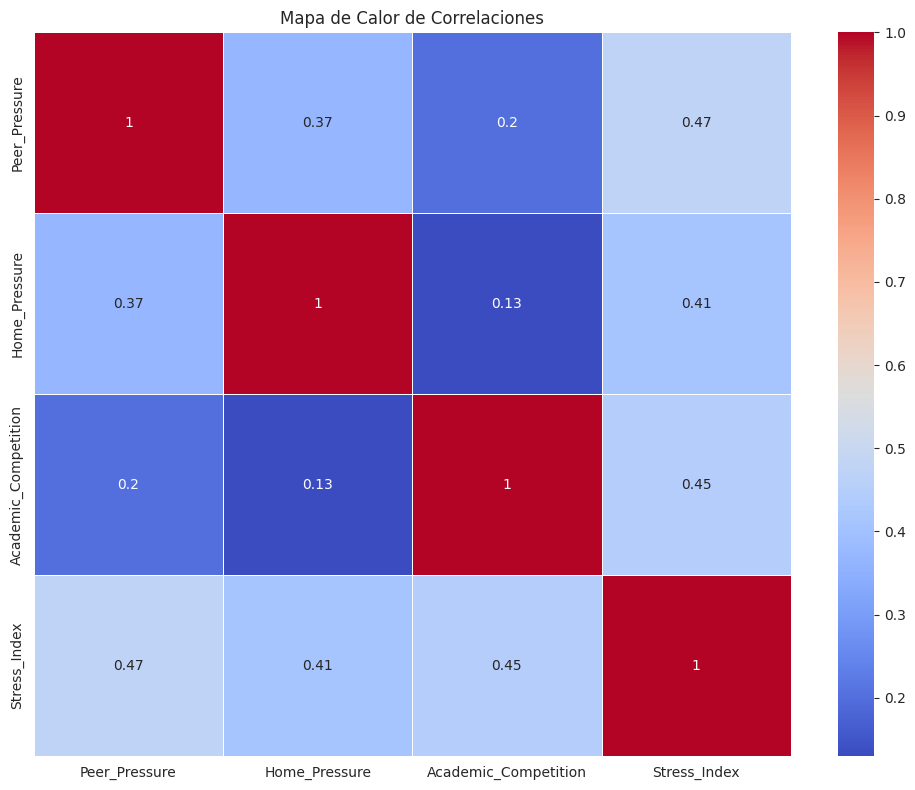

In [20]:
# --- Mapa de Calor de Correlaciones ---

plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=np.number)
# matriz de correlación.
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.savefig('mapa_calor_correlaciones.png')
print("Gráfico 'mapa_calor_correlaciones.png' guardado.")
plt.show()

### Comparando Distribuciones con Gráficos de Cajas

Mientras que el mapa de calor es excelente para las relaciones entre variables numéricas, un **gráfico de cajas (o boxplot)** es ideal para comparar la distribución de una variable numérica a través de diferentes categorías.

Un gráfico de cajas nos muestra de un vistazo:
* La **mediana** (la línea central), que representa el valor medio del estrés.
* El **rango intercuartílico** (la caja), que contiene el 50% central de los datos.
* El **rango completo** de los datos (las líneas o "bigotes").
* Los **valores atípicos (outliers)**, que aparecen como puntos individuales.

El siguiente código creará un boxplot para comparar las distribuciones del `Stress_Index` para cada `Study_Environment`. Esto nos permitirá ver no solo el nivel de estrés promedio en cada entorno, sino también su variabilidad y si existen valores extremos.

/tmp/ipython-input-323580923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Study_Environment', y='Stress_Index', data=df, palette='pastel')


Gráfico 'boxplot_estres_entorno.png' guardado.


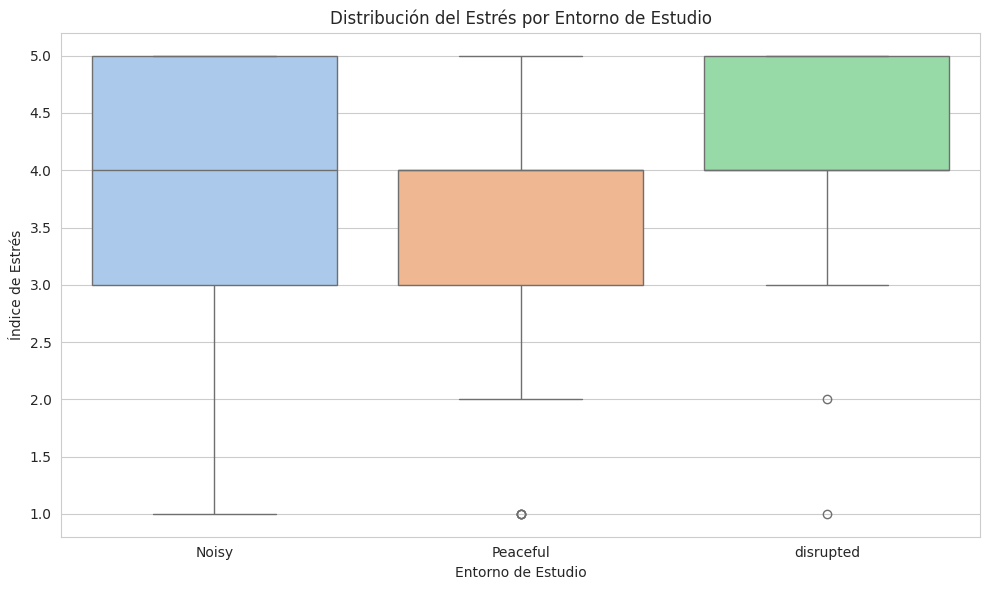

In [21]:
# --- Boxplot de Distribución del Estrés por Entorno de Estudio ---

# 1. Crea figura.
plt.figure(figsize=(10, 6))

# 2. Crea boxplot.
#    'Study_Environment' (eje X) con 'Stress_Index' (eje Y).
sns.boxplot(x='Study_Environment', y='Stress_Index', data=df, palette='pastel')

# 3. título descriptivo.
plt.title('Distribución del Estrés por Entorno de Estudio')
plt.xlabel('Entorno de Estudio')
plt.ylabel('Índice de Estrés')
plt.tight_layout()
plt.savefig('boxplot_estres_entorno.png')
print("Gráfico 'boxplot_estres_entorno.png' guardado.")
plt.show()

### Estudiando la Relación entre Dos Variables Numéricas

Para nuestro análisis visual final, utilizaremos un **gráfico de dispersión (scatterplot)**. Este tipo de gráfico es la herramienta fundamental para observar la relación y la tendencia entre dos variables numéricas. Cada punto en el gráfico representa una observación individual (un estudiante), posicionado según sus valores en el eje X y el eje Y.

El siguiente código creará un gráfico para explorar la relación entre el `Academic_Competition` (nivel de competencia percibido) y el `Stress_Index` (índice de estrés). Buscaremos patrones en los puntos:
* ¿Siguen una tendencia ascendente (a mayor competencia, mayor estrés)?
* ¿Siguen una tendencia descendente?
* ¿O no muestran ninguna relación aparente?

Además, usaremos un código de colores para diferenciar por `Academic_Stage`, lo que nos permitirá ver si esta relación varía entre los distintos niveles académicos.

Gráfico 'dispersion_competencia_estres.png' guardado.


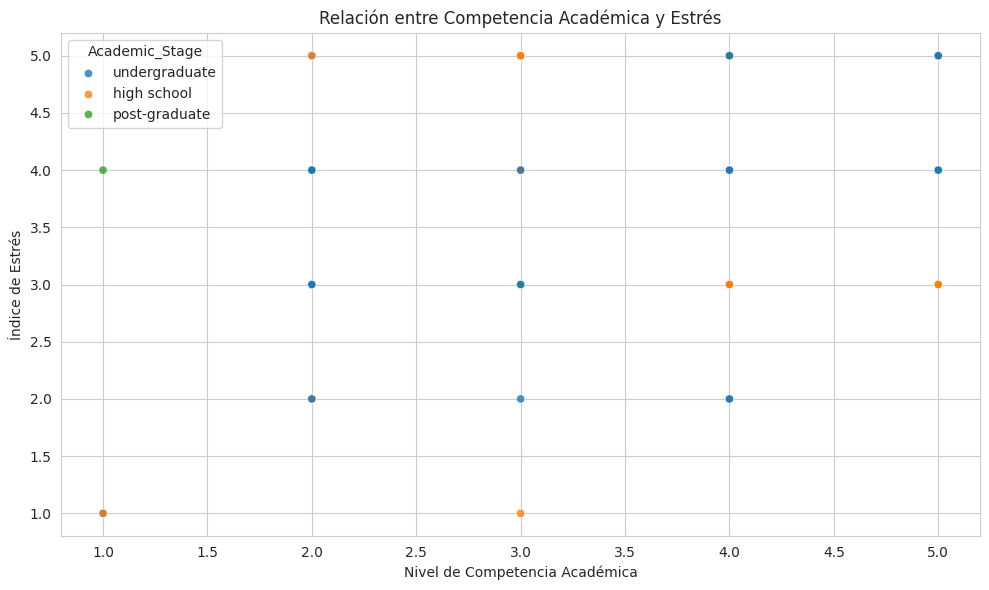

In [22]:
# --- Gráfico de Dispersión entre Competencia y Estrés ---

# 1. Crear figura.
plt.figure(figsize=(10, 6))

# 2.  gráfico de dispersión.
#    'hue' añade color según una tercera variable (categórica), lo que enriquece el análisis.
#    'alpha' controla la transparencia de los puntos, útil si hay muchos.
sns.scatterplot(x='Academic_Competition', y='Stress_Index', data=df, hue='Academic_Stage', alpha=0.8)

# 3.  títulos.
plt.title('Relación entre Competencia Académica y Estrés')
plt.xlabel('Nivel de Competencia Académica')
plt.ylabel('Índice de Estrés')

# 4. Ajustamos, guardamos y mostramos.
plt.tight_layout()
plt.savefig('dispersion_competencia_estres.png')
print("Gráfico 'dispersion_competencia_estres.png' guardado.")
plt.show()

### Procesamiento de Lenguaje Natural (NLP) 🗣️

Nuestro conjunto de datos no solo contiene números, sino también texto valioso en la columna `Coping_Strategy`. Para que una máquina pueda entender y analizar este texto, debemos usar técnicas de **Procesamiento de Lenguaje Natural (NLP)**.

En esta sección, aplicaremos dos conceptos fundamentales de NLP:

1.  **Tokenización y Lematización**:
    * **Tokenización**: Es el proceso de dividir una oración en sus palabras individuales o "tokens".
    * **Lematización**: Es el proceso de reducir cada palabra a su forma base o raíz (su "lema"). Por ejemplo, el lema de "caminando" es "caminar". Esto nos ayuda a agrupar palabras con el mismo significado.

2.  **Similitud del Coseno**:
    * Para comparar dos textos, primero debemos convertirlos en vectores numéricos. Una vez hecho esto, podemos usar la **similitud del coseno** para medir qué tan parecidos son. Un valor de 1 significa que son idénticos, y un valor de 0 significa que son completamente diferentes.

El siguiente bloque de código demostrará cómo aplicar estas técnicas a las estrategias de afrontamiento de los estudiantes.

In [14]:
print("\n--- Parte 4: Procesamiento de Lenguaje Natural ---")

# Descargar recursos de NLTK
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except Exception:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/wordnet')
except Exception:
    nltk.download('wordnet', quiet=True)
try:
    nltk.data.find('tokenizers/punkt_tab')
except Exception:
    nltk.download('punkt_tab', quiet=True)


print("Recursos de NLTK descargados.")

# --- Ejemplo de Tokenización y Lematización ---
lemmatizer = WordNetLemmatizer()
sample_strategy = df['Coping_Strategy'].iloc[2] # "Social support (friends, family)"
text = re.sub(r'[^a-zA-Z\s]', '', sample_strategy, re.I|re.A).lower()
tokens = word_tokenize(text)
lemmas = [lemmatizer.lemmatize(token) for token in tokens]
print(f"\nEjemplo de Lematización para: '{sample_strategy}'")
print(f"Lemas resultantes: {lemmas}")

# --- Ejemplo de Similitud del Coseno con SciPy ---
text1 = df['Coping_Strategy'].iloc[0] # 'Analyze the situation...'
text2 = df['Coping_Strategy'].iloc[2] # 'Social support...'
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([text1, text2]).toarray()
similarity = 1 - cosine(vectors[0], vectors[1])
print(f"\nSimilitud del Coseno entre dos estrategias: {similarity:.4f}")


--- Parte 4: Procesamiento de Lenguaje Natural ---
Recursos de NLTK descargados.

Ejemplo de Lematización para: 'Social support (friends, family)'
Lemas resultantes: ['social', 'support', 'friend', 'family']

Similitud del Coseno entre dos estrategias: 0.0000


### Modelado Predictivo con Machine Learning y Deep Learning 🤖🧠

Hemos llegado a la fase final: la **predicción**. Después de limpiar, explorar y entender nuestros datos, ahora construiremos modelos predictivos. El objetivo es entrenar un sistema que pueda aprender de los datos de los estudiantes para predecir su nivel de estrés (`Stress_Index`) basándose en las otras características.

Para ello, seguiremos varios pasos clave en el siguiente bloque de código:

1.  **Preparación Final de los Datos**:
    * **One-Hot Encoding**: Los modelos matemáticos no entienden texto (ej. "undergraduate", "Peaceful"). Convertiremos todas las variables categóricas en un formato numérico binario que el modelo pueda procesar.
    * **División en Entrenamiento y Prueba**: Separaremos nuestros datos en dos conjuntos. El modelo "aprenderá" de los patrones en el **conjunto de entrenamiento** y luego evaluaremos su rendimiento en el **conjunto de prueba**, que contiene datos que nunca ha visto antes. Esto es crucial para asegurar que el modelo puede generalizar y no solo memorizar.

2.  **Construcción y Entrenamiento de Modelos**:
    * **Modelo 1: Random Forest**: Implementaremos un clasificador *Random Forest* con Scikit-Learn. Es un modelo de Machine Learning tradicional muy potente y robusto, excelente para problemas de clasificación.
    * **Modelo 2: Red Neuronal**: Construiremos una red neuronal simple utilizando TensorFlow y Keras. Este es un enfoque de *Deep Learning* que puede capturar relaciones más complejas y no lineales en los datos.

Finalmente, compararemos la **precisión (accuracy)** de ambos modelos para ver cuál funciona mejor en la predicción del estrés académico para este conjunto de datos.

In [24]:
# Convertimos variables categóricas a numéricas (One-Hot Encoding)
df_processed = pd.get_dummies(df, drop_first=True)

# Definimos características (X) y objetivo (y)
X = df_processed.drop('Stress_Index', axis=1)
y = df_processed['Stress_Index']

# datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Datos divididos: {X_train.shape[0]} para entrenamiento, {X_test.shape[0]} para prueba.")

# --- Modelo 1: Random Forest con Scikit-Learn ---
print("\nEntrenando modelo Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de Random Forest: {accuracy_rf * 100:.2f}%")
# print("\nReporte de Clasificación (Random Forest):")
# print(classification_report(y_test, y_pred_rf))

# --- Modelo 2: Red Neuronal con TensorFlow/Keras ---
# Escalar características numéricas
scaler = StandardScaler()
numeric_features = ['Peer_Pressure', 'Home_Pressure', 'Academic_Competition']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# etiquetas para Keras (de 1-5 a 0-4)
y_train_keras = y_train - 1
y_test_keras = y_test - 1

# Modelo
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax') # 5 clases de estrés
])
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
print("\nEntrenando la Red Neuronal...")
nn_model.fit(X_train_scaled, y_train_keras, epochs=50, batch_size=16, verbose=0)

# Evalua el modelo
loss, accuracy_nn = nn_model.evaluate(X_test_scaled, y_test_keras, verbose=0)
print(f"Precisión de la Red Neuronal: {accuracy_nn * 100:.2f}%")

print("\n\n--- ANÁLISIS COMPLETO FINALIZADO ---")


--- Parte 5: Machine Learning y Deep Learning ---
Datos divididos: 112 para entrenamiento, 28 para prueba.

Entrenando modelo Random Forest...
Precisión de Random Forest: 17.86%

Entrenando la Red Neuronal...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión de la Red Neuronal: 50.00%


--- ANÁLISIS COMPLETO FINALIZADO ---


### Conclusion 🚀

Después de analizar los datos, llegué a las siguientes conclusiones:

* **Factores Clave del Estrés**: Descubrí que las **presiones externas** (de casa y compañeros) y una **alta competencia académica** son los factores que tienen la correlación más fuerte y positiva con el estrés de los estudiantes.
* **Influencia del Entorno**: El **nivel académico** (siendo posgrado el más alto) y un **entorno de estudio ruidoso** también demostraron ser factores que aumentan los niveles de estrés.
* **Rendimiento de Modelos**: Para la predicción, probé dos enfoques:
    * Un **Random Forest** clásico, que tuvo un rendimiento muy bajo (**~18%** de precisión).
    * Una **Red Neuronal** simple, que funcionó significativamente mejor, alcanzando un **50%** de precisión.
* **Conclusión Final**: La superioridad de la Red Neuronal sugiere que las relaciones que causan el estrés son complejas y no lineales. Aunque el 50% de precisión es un buen comienzo, la principal limitación fue el **pequeño tamaño del dataset**. Con más datos, estoy seguro de que el modelo de Deep Learning podría mejorar mucho más.